# Task - 01: Prediction using Supervised ML
***
Predict the percentage of an student based on the no. of study hours.
***

* There are two attributes difining the dataset namely hours of study and score obtained,

|Field|Description|
|---:|:---|
|Hours|Hours of Study|
|Score|Score Obtained|

### Exploratory Data Analysis

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Saved data in local storage and imported it
df = pd.read_csv('http://bit.ly/w-data')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


`Findings`
Hours attribute is having float and scores attribute is having int values *without any null values*

In [5]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

<BarContainer object of 25 artists>

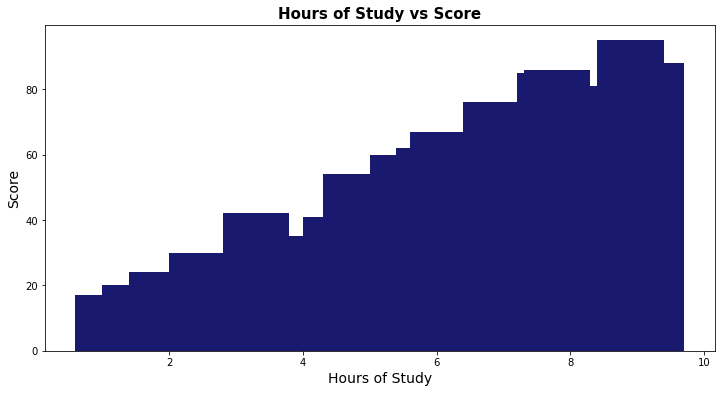

In [6]:
plt.figure(figsize=(12,6))
plt.title('Hours of Study vs Score', fontsize = 15, fontweight = 'bold')
plt.xlabel('Hours of Study', fontsize = 14)  
plt.ylabel('Score', fontsize = 14) 
plt.bar(x = df['Hours'], height = df['Scores'], width = 1, color = 'midnightblue')

`Findings`: Score is getting increased with increase in number of hours. Let's try to visualise its scatter plot also

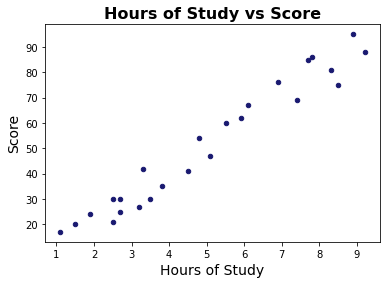

In [7]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', kind = 'scatter', color = 'midnightblue')  
plt.title('Hours of Study vs Score', fontsize = 16, fontweight = 'bold')  
plt.xlabel('Hours of Study', fontsize = 14)  
plt.ylabel('Score', fontsize = 14)  
plt.show()

`Findings`: As can be seen, score is getting increased with hours of study. This dataset can be fitted in linear regression model.

### Modelling 

* Seperating attributes from target attribute

In [8]:
x = df[['Hours']]
y = df[['Scores']]

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

* Splitting the data into training and test data and taking 25% of the data as training data

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25)

In [11]:
X_test.shape, X_train.shape, Y_test.shape, Y_train.shape

((7, 1), (18, 1), (7, 1), (18, 1))

* Fitting Linear Regression Model to Training Dataset

In [12]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [13]:
Y_pred = lr.predict(X_test)

* Plotting Regression line on original plot

Text(0, 0.5, 'Score')

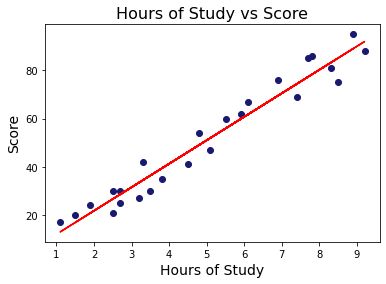

In [14]:
plt.scatter(x, y, color = 'midnightblue') 
plt.plot(x, lr.predict(x), color = 'red')
plt.title('Hours of Study vs Score', fontsize = 16)  
plt.xlabel('Hours of Study', fontsize = 14)  
plt.ylabel('Score', fontsize = 14) 

* Model Evaluation

In [15]:
print('R2 score for this model is', r2_score(Y_test,Y_pred))
print('MSE', mean_squared_error(Y_test, Y_pred))

R2 score for this model is 0.9548601465962931
MSE 30.523753115886183


In [16]:
lr.predict([[9.25]])

array([[92.46218265]])

*** 
* Predicting Target Value for Hours = 9.25 as 92.46
***

In [17]:
intercept = lr.intercept_
intercept

array([2.27229747])

In [18]:
slope = lr.coef_
slope

array([[9.75025786]])

***
Linear Regression Line Parameters are as follows:
Intercept = 2.27
Slope = 9.75
***